# Perceptron Algorithm

Perceptron algorithm implemented from scratch using the multicass extension (one vs all) for the Iris dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('iris.csv')
df.replace({'variety':{'Setosa':0, 'Versicolor':1, 'Virginica':2}},inplace=True)
X = df.iloc[:,0:4].to_numpy()
Y = df['variety'].to_numpy()
Y_0 = np.where(Y == 0, 1, -1)
Y_1 = np.where(Y == 1, 1, -1)
Y_2 = np.where(Y == 2, 1, -1)
n_features = 4
classes = 3

w = np.zeros((n_features))
b = 0

def perceptron(X,Y,w,b):
    l = len(X)
    for t in range(l):
        x_t = X[t]
        y_t = Y[t]
        y_hat = np.dot(w, x_t) + b
        if y_hat * y_t <= 0:
            w += y_t * x_t
            b += y_t
    return (w,b)

w0,b0 = perceptron(X,Y_0,w,b)
w1, b1 = perceptron(X,Y_1,w,b)
w2, b2 = perceptron(X,Y_2,w,b)

print('Parameters for Setosa class after iterating the perceptron algo. once on the entire dataset w=',w0,'b=',b0)
print('Parameters for Versicolor class after iterating the perceptron algo. once on the entire dataset w=',w1,'b=',b1)
print('Parameters for Verginica class after iterating the perceptron algo. once on the entire dataset w=',w2,'b=',b2)

Parameters for Setosa class after iterating the perceptron algo. once on the entire dataset w= [5.1 3.5 1.4 0.2] b= 0
Parameters for Versicolor class after iterating the perceptron algo. once on the entire dataset w= [5.1 3.5 1.4 0.2] b= 0
Parameters for Verginica class after iterating the perceptron algo. once on the entire dataset w= [5.1 3.5 1.4 0.2] b= 1


/var/folders/7m/x_cpspc92hs64dmdlp0lv5qm0000gn/T/ipykernel_30515/4284244194.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'variety':{'Setosa':0, 'Versicolor':1, 'Virginica':2}},inplace=True)


Training curves of accuracies associated with the low-level and high-level classifiers at each training iteration (10 iterations).

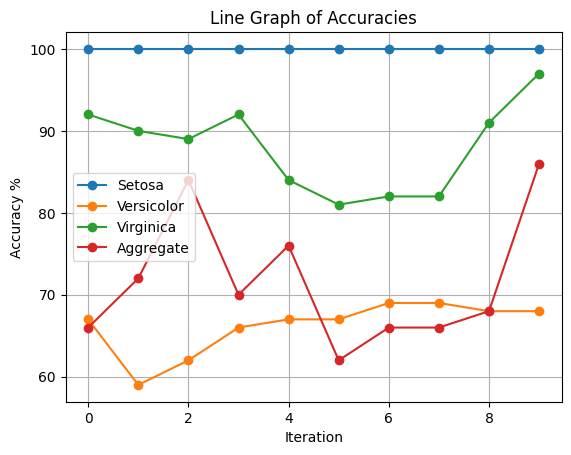

The accuracy of the High-Level classifier is 86.0 %


In [12]:
from sklearn.model_selection import train_test_split

train_X, testX, train_Y, testY = train_test_split(X, Y, test_size=0.33, random_state=5)

trainY_0 = np.where(train_Y == 0, 1, -1)
trainY_1 = np.where(train_Y == 1, 1, -1)
trainY_2 = np.where(train_Y == 2, 1, -1)


def check_accuracy(w,b,train_X,train_Y):
    size = len(train_X)
    count = 0
    for i in range(size):
        x_i = train_X[i]
        y_i = train_Y[i]
        y_hat = np.dot(w, x_i) + b
        if y_hat * y_i > 0:
            count += 1
    return count/size

def check_multi_acc(w,b,testX,testY):
    size = len(testX)
    count = 0
    for i in range(size):
        x_i = testX[i]
        y_i = testY[i]
        y_hat = np.argmax(np.dot(w, x_i) + b)
        if y_hat == y_i:
            count += 1
    return count/size

w0 = np.zeros((n_features))
b0 = 0
w1 = np.zeros((n_features))
b1 = 0
w2 = np.zeros((n_features))
b2 = 0
values = []

for i in range(10):
    w0,b0 = perceptron(train_X,trainY_0,w0,b0)
    w1, b1 = perceptron(train_X,trainY_1,w1,b1)
    w2, b2 = perceptron(train_X,trainY_2,w2,b2)
    acc0 = check_accuracy(w0,b0,train_X,trainY_0)
    acc1 = check_accuracy(w1,b1,train_X,trainY_1)
    acc2 = check_accuracy(w2,b2,train_X,trainY_2)
    acc_total = check_multi_acc([w0,w1,w2],[b0,b1,b2],testX,testY)
    acc = [acc0, acc1, acc2, acc_total]
    acc = [x * 100 for x in acc]
    values.append(acc)


## Ploting Graphs
x_axis = list(range(10))
labels = ['Setosa', 'Versicolor', 'Virginica', 'Aggregate']

for i in range(4):
    data = [sublist[i] for sublist in values]
    plt.plot(data, label=labels[i], marker='o')

plt.legend()

plt.title('Line Graph of Accuracies')
plt.xlabel('Iteration')
plt.ylabel('Accuracy %')
plt.grid(True)

# Show the plot
plt.show()

print("The accuracy of the High-Level classifier is",acc_total*100,"%")

# Ridge Regression Visualization

How ridge regression is impacted with different $\lambda$ values.

Ridge Reression: $\textrm{min}_{w\in\mathbb{R}^d,b\in\mathbb{R}} \frac{1}{2k}\|Xw +b\mathbb{1} - y\|_2^2 + \lambda \|w\|_2^2$  

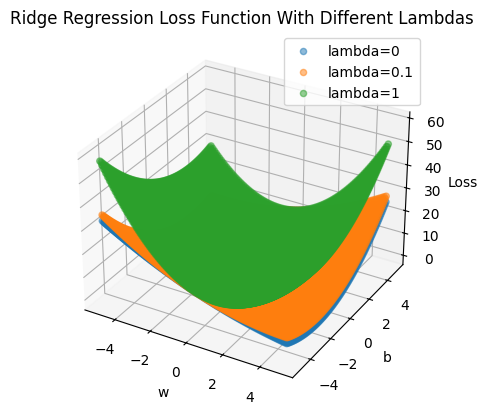

In [13]:
mystery_data = pd.read_csv('Mystery.csv')
X = mystery_data['X'].to_numpy()
y = mystery_data['y'].to_numpy()

def loss(X,y,w,b,lamb):
    k = len(X)
    ones = np.ones(k)
    a = 1/(2*k) * np.linalg.norm(X * w + b * ones - y, ord=2)**2
    return a + lamb * w**2

w_range = np.linspace(-5, 5, 100)
b_range = np.linspace(-5, 5, 100)

w, b = np.meshgrid(w_range,b_range)
l0 = np.zeros_like(w)
l1 = np.zeros_like(w)
l2 = np.zeros_like(w)


for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        l0[i,j] = loss(X,y,w[i,j], b[i,j],0)
        l1[i,j] = loss(X,y,w[i,j], b[i,j],0.1)
        l2[i,j] = loss(X,y,w[i,j], b[i,j],1)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(w.flatten(), b.flatten(), l0.flatten(), alpha=0.5, label='lambda=0')
ax.scatter(w.flatten(), b.flatten(), l1.flatten(), alpha=0.5, label='lambda=0.1')
ax.scatter(w.flatten(), b.flatten(), l2.flatten(), alpha=0.5, label='lambda=1')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.set_title('Ridge Regression Loss Function With Different Lambdas')

plt.legend()

plt.show()

# Clustering

K-means clustering using Lloyd's algorithm from scratch

In [15]:
import collections

def random_cluster(X,k):
    n = len(X)
    j = 0
    clusters = collections.defaultdict(list)
    for i in range(n):
        clusters[j].append(X[i])
        j = 0 if j == k-1 else j+1
    return clusters    


def is_dict_equal(d1, d2):
    if len(d1) != len(d2):
        return False
    for key, v1 in d1.items():
        v2 = d2.get(key)
        if v2 is None or not np.array_equal(v1, v2):
            return False
    return True

def cluster(X,k):
    n = len(X)
    old = collections.defaultdict(list)
    new = random_cluster(X,k)
    while not is_dict_equal(old, new):
        old = new
        new = collections.defaultdict(list)
        centroids = {}
        for k in old:
            centroids[k] = np.mean(old[k],axis = 0)

        for i in range(n):
            new_centroid = np.argmin([np.linalg.norm(X[i] - centroids[j]) for j in centroids])
            new[new_centroid].append(X[i])
    return new

Comparing the Lloyd's algorithm to the build in Kmeans clustering for artificial dataset with 2 features and 3 recognizable clusters.

2


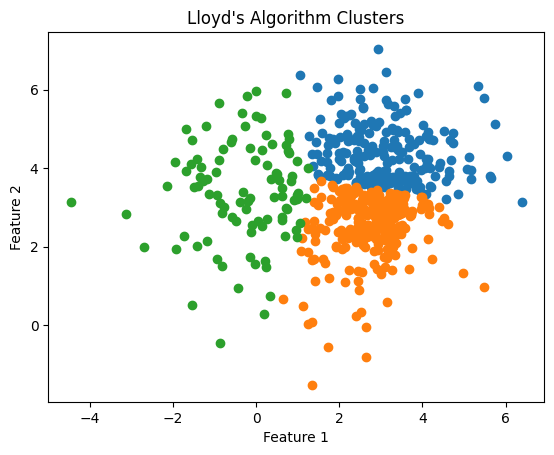

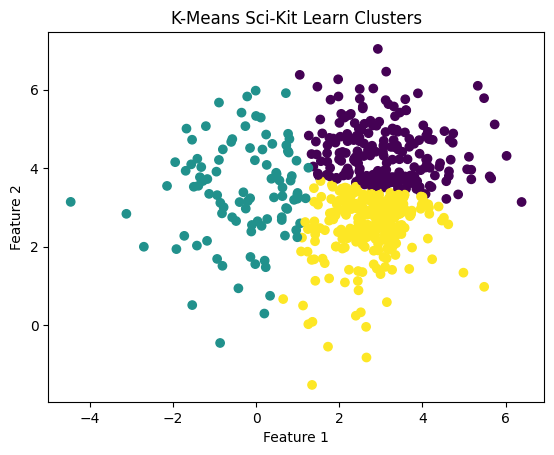

In [21]:
from sklearn.cluster import KMeans

c1 = np.random.randn(200, 2) * 1 + np.array([3, 4])
c2 = np.random.randn(200, 2) * 0.5 + np.array([3, 3])
c3 = np.random.randn(200, 2) * 1.5 + np.array([1, 3])
data = np.concatenate([c1, c2, c3])

my_algo = cluster(data,3)
for cluster_label, points in my_algo.items():
    cluster_data = np.array(points)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_label}")


print(cluster_label)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Lloyd's Algorithm Clusters")
plt.show()


kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Sci-Kit Learn Clusters")
plt.show()